<a href="https://colab.research.google.com/github/deepti-iiitr/spam-detector-2/blob/main/spam_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

In [5]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam (1).csv


In [6]:
df = pd.read_csv('spam.csv' , encoding = "ISO-8859-1")

In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4726,spam,Had your mobile 10 mths? Update to the latest ...,NaN,NaN,NaN
2815,ham,Genius what's up. How your brother. Pls send h...,NaN,NaN,NaN
3376,ham,Yup. Wun believe wat? U really neva c e msg i ...,NaN,NaN,NaN
44,ham,Great! I hope you like your man well endowed. ...,NaN,NaN,NaN
5272,ham,Hello.How u doing?What u been up 2?When will u...,NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

In [9]:
# DATA CLEANING

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df.sample(5)

,v1,v2
2856,ham,Today i'm not workin but not free oso... Gee.....
974,ham,Eh u send wrongly lar...
5474,ham,Where's mummy's boy ? Is he being good or bad ...
2954,ham,Id have to check but there's only like 1 bowls...
705,ham,I don't think I can get away for a trek that l...


In [13]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
561,ham,Thanx 4 e brownie it's v nice...
1845,ham,Hi. || Do u want | to join me with sts later? ...
39,ham,Hello! How's you and how did saturday go? I wa...
4914,ham,We took hooch for a walk toaday and i fell ove...
4466,ham,"She said,'' do u mind if I go into the bedroom..."


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['target'] = encoder.fit_transform(df['target'])

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
# check for duplicate values
df.duplicated().sum()

403

In [19]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

In [22]:
# EDA

In [23]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

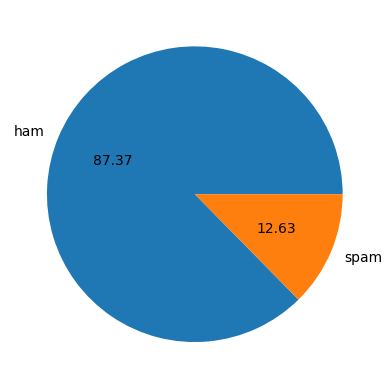

In [25]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [26]:
import nltk

In [27]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
df['num_characters'] = df['text'].apply(len)

In [30]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

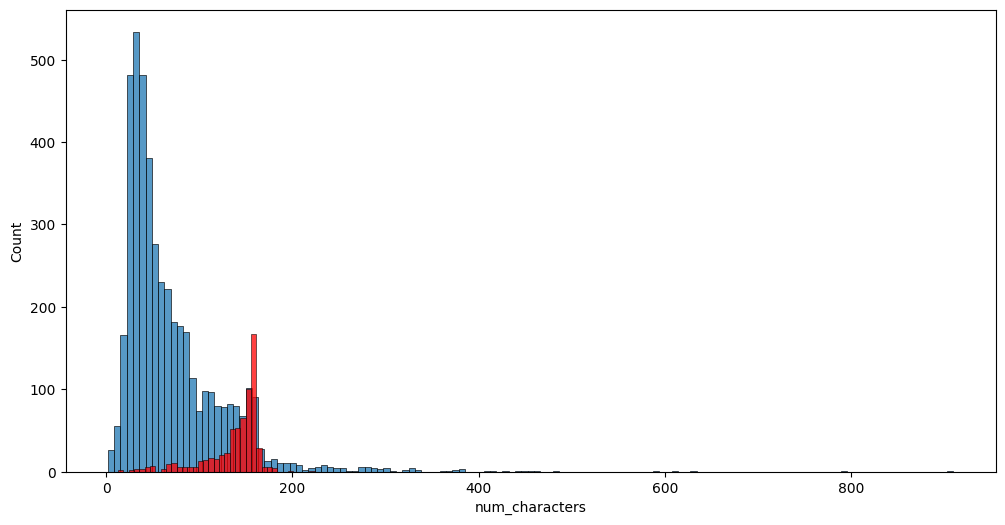

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

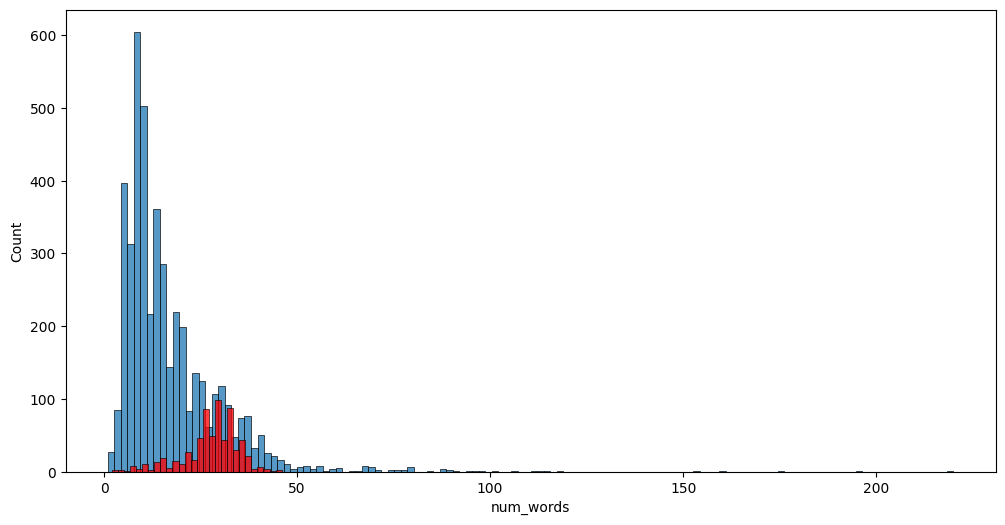

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')


In [37]:
# DATA PREPROCESSING

In [38]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
transform_text("I'm gonna be home soon and play chess.")

'gon na home soon play chess'

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [41]:
df['transformed_text'] = df['text'].apply(transform_text)

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


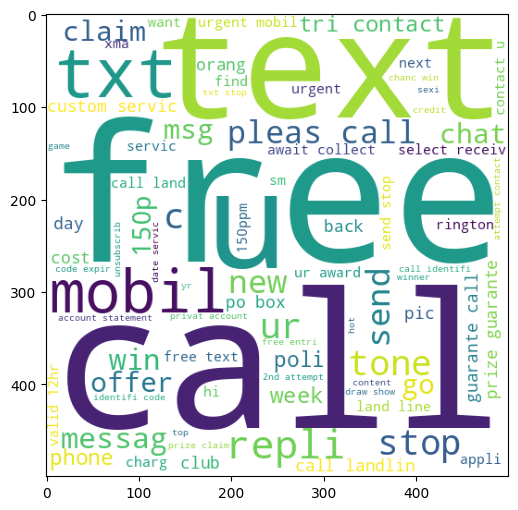

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [47]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

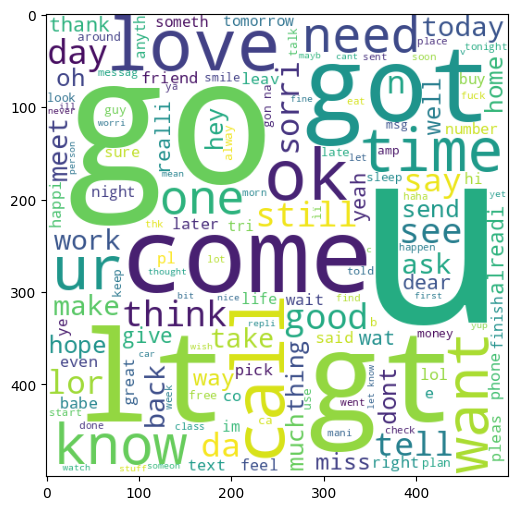

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
len(spam_corpus)

9939

In [81]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


# Split into features and labels
X = df["text"]
y = df["target"]

# Perform TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Apply SMOTE to the feature matrix
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 4516, 1: 4516}


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train and evaluate the Multinomial Naive Bayes classifier
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train)
y_pred_mnb = clf_mnb.predict(X_test)
acc_mnb = accuracy_score(y_test, y_pred_mnb)
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
prec_mnb = precision_score(y_test, y_pred_mnb)
f1_mnb = f1_score(y_test, y_pred_mnb)
print("Multinomial Naive Bayes:")
print("Accuracy:", acc_mnb)
print("Confusion matrix:\n", cm_mnb)
print("Precision:", prec_mnb)
print("F1 score:", f1_mnb)

# Train and evaluate the Bernoulli Naive Bayes classifier
clf_bnb = BernoulliNB()
clf_bnb.fit(X_train, y_train)
y_pred_bnb = clf_bnb.predict(X_test)
acc_bnb = accuracy_score(y_test, y_pred_bnb)
cm_bnb = confusion_matrix(y_test, y_pred_bnb)
prec_bnb = precision_score(y_test, y_pred_bnb)
f1_bnb = f1_score(y_test, y_pred_bnb)
print("Bernoulli Naive Bayes:")
print("Accuracy:", acc_bnb)
print("Confusion matrix:\n", cm_bnb)
print("Precision:", prec_bnb)
print("F1 score:", f1_bnb)

# Train and evaluate the Gaussian Naive Bayes classifier
clf_gnb = GaussianNB()
clf_gnb.fit(X_train_dense, y_train)
y_pred_gnb = clf_gnb.predict(X_test_dense)
acc_gnb = accuracy_score(y_test, y_pred_gnb)
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
prec_gnb = precision_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
print("Gaussian Naive Bayes:")
print("Accuracy:", acc_gnb)
print("Confusion matrix:\n", cm_gnb)
print("Precision:", prec_gnb)
print("F1 score:", f1_gnb)


Multinomial Naive Bayes:
Accuracy: 0.9894853348090759
Confusion matrix:
 [[875   9]
 [ 10 913]]
Precision: 0.9902386117136659
F1 score: 0.9897018970189702
Bernoulli Naive Bayes:
Accuracy: 0.9911455451023796
Confusion matrix:
 [[884   0]
 [ 16 907]]
Precision: 1.0
F1 score: 0.9912568306010929
Gaussian Naive Bayes:
Accuracy: 0.9501936912008855
Confusion matrix:
 [[794  90]
 [  0 923]]
Precision: 0.9111549851924975
F1 score: 0.9535123966942148


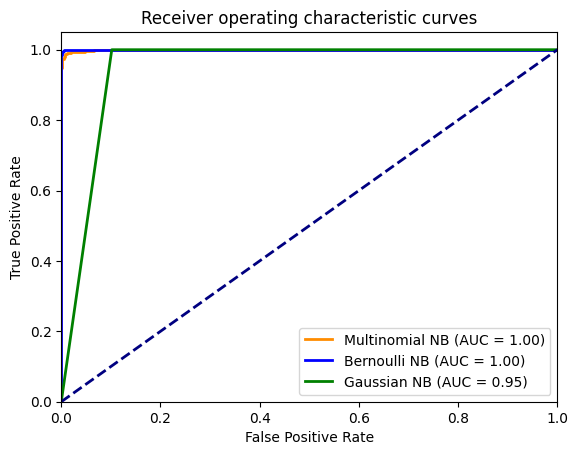

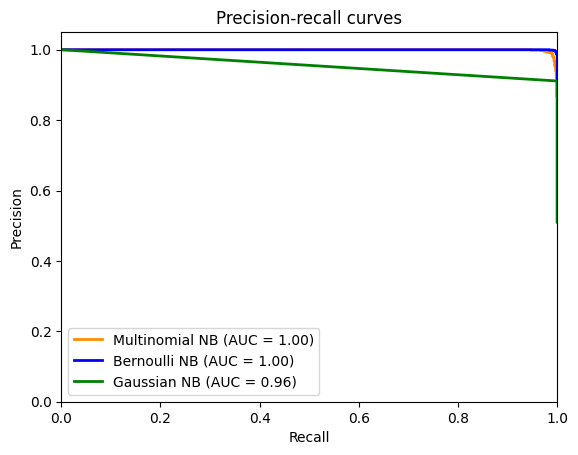

In [91]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Compute and plot ROC curves
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, clf_mnb.predict_proba(X_test)[:, 1])
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)

fpr_bnb, tpr_bnb, _ = roc_curve(y_test, clf_bnb.predict_proba(X_test)[:, 1])
roc_auc_bnb = auc(fpr_bnb, tpr_bnb)

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, clf_gnb.predict_proba(X_test_dense)[:, 1])
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

plt.figure()
lw = 2
plt.plot(fpr_mnb, tpr_mnb, color='darkorange', lw=lw, label='Multinomial NB (AUC = %0.2f)' % roc_auc_mnb)
plt.plot(fpr_bnb, tpr_bnb, color='blue', lw=lw, label='Bernoulli NB (AUC = %0.2f)' % roc_auc_bnb)
plt.plot(fpr_gnb, tpr_gnb, color='green', lw=lw, label='Gaussian NB (AUC = %0.2f)' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curves')
plt.legend(loc="lower right")
plt.show()

# Compute and plot PR curves
precision_mnb, recall_mnb, _ = precision_recall_curve(y_test, clf_mnb.predict_proba(X_test)[:, 1])
pr_auc_mnb = auc(recall_mnb, precision_mnb)

precision_bnb, recall_bnb, _ = precision_recall_curve(y_test, clf_bnb.predict_proba(X_test)[:, 1])
pr_auc_bnb = auc(recall_bnb, precision_bnb)

precision_gnb, recall_gnb, _ = precision_recall_curve(y_test, clf_gnb.predict_proba(X_test_dense)[:, 1])
pr_auc_gnb = auc(recall_gnb, precision_gnb)

plt.figure()
lw = 2
plt.plot(recall_mnb, precision_mnb, color='darkorange', lw=lw, label='Multinomial NB (AUC = %0.2f)' % pr_auc_mnb)
plt.plot(recall_bnb, precision_bnb, color='blue', lw=lw, label='Bernoulli NB (AUC = %0.2f)' % pr_auc_bnb)
plt.plot(recall_gnb, precision_gnb, color='green', lw=lw, label='Gaussian NB (AUC = %0.2f)' % pr_auc_gnb)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curves')
plt.legend(loc="lower left")
plt.show()
